<a href="https://colab.research.google.com/github/Noahkandie/Hass-housing-prices-project-/blob/main/Hass_housing_prices_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Overview

Within your deliverable you are expected to:

    Define the question, the metric for success, the context, experimental design taken.
    Read and explore the given dataset.
    Define the appropriateness of the available data to answer the given question.
    Find and deal with outliers, anomalies, and missing data within the dataset.
    Perform univariate, bivariate and multivariate analysis recording your observations.
    Performing regression analysis.
        Incorporate categorical independent variables into your models.
        Check for multicollinearity
    Provide a recommendation based on your analysis.
        Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
    Challenge your solution by providing insights on how you can make improvements in model improvement.

While performing your regression analysis, you will be required to perform modeling using the given regression techniques then evaluate their performance. You will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem.

1. Multiple Linear Regression
2. Quantile Regression
3. Ridge Regression
4. Lasso Regression
5. Elastic Net Regression


## 1.1 Research Question

Study the factors that affect housing prices, and then create a model that would allow the company to accurately predict the sale of prices given certain predictor/target variables.


## 1.2 Metric for Success

The project will be a success if we are able to create a model that will allow Hass Consulting Company to accurately predict the sale of prices upon being provided with the predictor variables

## 1.3 Understanding the Context

Hass Consulting Company is a real estate leader with over 25 years of experience. This study will study the factors that affect housing prices using the given information on real estate properties owned that was collected over the past few months. We will then create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables

## 1.4 Experimental Design

- Data Cleaning and Preparation
    - Load libraries and dataset
    - Deal with missing values
    - Deal with duplicated records
- Perform EDA
    - Univariate Analysis
    - Bivariate Analysis
- Split dataset into testing and training data
- Carry out regression while providing brief descriptions of how each regression model differs from the               other regression models and what their limitations are
    - Multiple Linear Regression
    - Quantile Regression
    - Lasso Regression
    - Ridge Regression
    - Elastic Net Regression
- Make predictions using the different regression models
- Assess the accuracy of the different regression models
- Make conclusions & challenge the solution

## 1.5 Appropriateness of Data

Below is the dataset glossary:

    * Id
    * price :    Price of the house
    * bedrooms :   Number of Bedrooms
    * bathrooms :   Number of Bathrooms
    * sqft_living :   Square feet area of living area
    * sqft_lot :   Square feet area of parking Layout
    * floors :   Number of Floors
    * waterfront:   Whether waterfront is there or not
    * view :   Number of Views
    * grade :   Grades
    * sqft_above
    * sqft_basement :   Square feet area off basement
    * yr_built :   Year the house is built
    * yr_renovated :   Year the house is renovated
    * zipcode :   zipcode os the house
    * lat :   Latitude of the house
    * lon : Longitude of the house
    * sqft_living15
    * sqft_lot15
The grade variable has an index range
  grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.


## 2.1 Reading the Data

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
house=pd. read_csv('/content/Independent Project Week 7 - house_data.csv')
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [4]:
# Check data info
# 21613 rows and 20 columns with most being numerical data

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## 2.2 Data Preparation and Cleaning

In [5]:
# Check for missing values
house.isnull().sum()


id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# Check and drop duplicates
house[house.duplicated()]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14983,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20054,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


In [7]:
house.drop_duplicates(inplace=True)
house.duplicated().value_counts()

False    21610
dtype: int64

### 2.2.1 Change datatypes

In [8]:
# we'll convert the 'bathrooms' and 'floors' variables from float to int
# This is because the number of bathrooms and bedrooms is supposed to be a whole number
# Also change select variables to category and string datatypes

house['bathrooms'] = house['bathrooms'].astype('int64')
house['floors'] = house['floors'].astype('int64')
house['zipcode'] = house['zipcode'].astype(str)

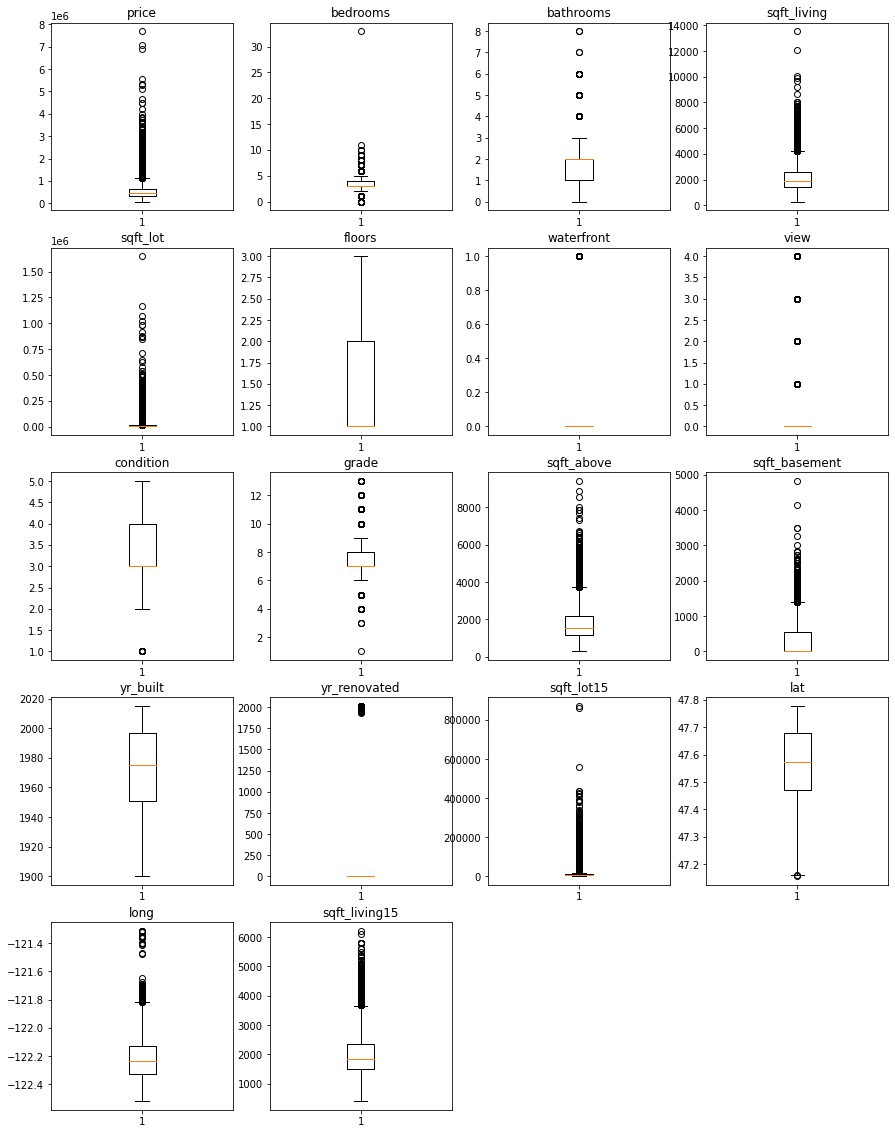

In [9]:
#Checking for outliers
columns_dict={'price':1, 'bedrooms':2, 'bathrooms':3, 'sqft_living':4, 'sqft_lot':5,
       'floors':6, 'waterfront':7, 'view':8, 'condition':9, 'grade':10, 'sqft_above':11,
       'sqft_basement':12, 'yr_built':13, 'yr_renovated':14, 'lat':16, 'long':17,
       'sqft_living15':18, 'sqft_lot15':15}
plt.figure(figsize=(15,20))
# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(house[variable])
  plt.title(variable)
plt.show()



We have a lot of outliers. Since the real estate sector has values ranging from the low to the high values, we shall not remove them.
A real estate expert can give a better understanding of the range of data and how we can reduce the outliers

Of interest, are the number of bedrooms.

In [10]:
print('Bedrooms= ',house['bedrooms'].unique())

# Checking for the outliers we get 33, an anomaly

Bedrooms=  [ 3  2  4  5  1  6  7  0  8  9 11 10 33]


In [11]:
house[house['bedrooms']==33]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,640000.0,33,1,1620,6000,1,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [12]:
# The house has 1 bathroom and a sqft of 1620 which is not ideal for a 33bedroomed house from logic
# We assume a typing error and change the bedrooms no to 3
house['bedrooms'] = house['bedrooms'].replace([33],3)
house['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10])

In [13]:
house['view'].value_counts()

0    19487
2      963
3      509
1      332
4      319
Name: view, dtype: int64

According to the description of that column, it is "an index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design,and 11-13 have a high quality level of construction and design".

This column's values will have the following grades:

    - Values 1-3 will be in grade 'E'
    - Values 4-6 will be in grade 'D'
    - Values 7 will be in grade 'C'
    - Values 8-10 will be in grade 'B'
    - Values 11-13 will be in grade 'A'


In [14]:
house['grade'].mask((house['grade'] == 1), 'E', inplace = True)
house['grade'].mask((house['grade'] == 2), 'E', inplace = True)
house['grade'].mask((house['grade'] == 3), 'E', inplace = True)
house['grade'].mask((house['grade'] == 4), 'D', inplace = True)
house['grade'].mask((house['grade'] == 5), 'D', inplace = True)
house['grade'].mask((house['grade'] == 6), 'D', inplace = True)
house['grade'].mask((house['grade'] == 7), 'C', inplace = True)
house['grade'].mask((house['grade'] == 8), 'B', inplace = True)
house['grade'].mask((house['grade'] == 9), 'B', inplace = True)
house['grade'].mask((house['grade'] == 10), 'B', inplace = True)
house['grade'].mask((house['grade'] == 11), 'A', inplace = True)
house['grade'].mask((house['grade'] == 12), 'A', inplace = True)
house['grade'].mask((house['grade'] == 13), 'A', inplace = True)

In [15]:
# We Drop unnecessary Columns
house.drop(columns=['id','sqft_living15', 'sqft_lot15','view','yr_built','yr_renovated'],inplace=True)

## 3. Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce83db4b10>,
      dtype=object)

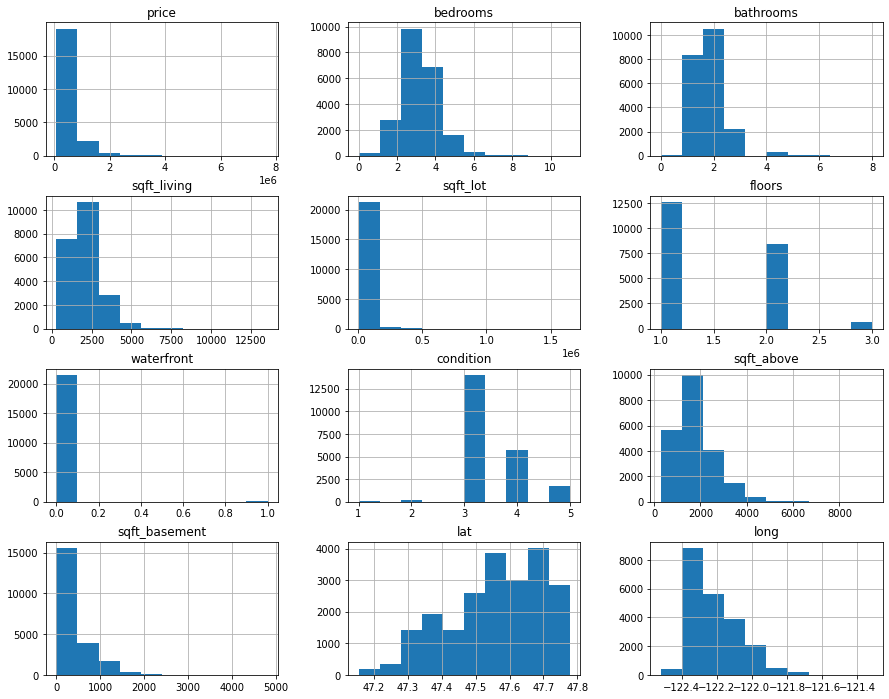

In [16]:
# Plot histograms
df1 = house.select_dtypes(include = ['int64', 'float64'])
df1.hist(figsize = (15, 12))

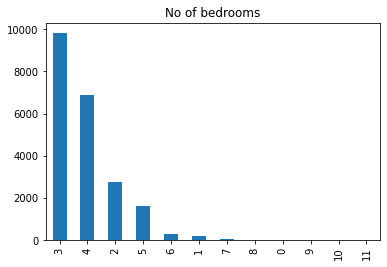

In [17]:
#Number of bedrooms in different houses
house['bedrooms'].value_counts().plot.bar(title='No of bedrooms')

Most of the houses sold purchased were 3 bedroomed houses. few people purchsed the one bedrooms houses

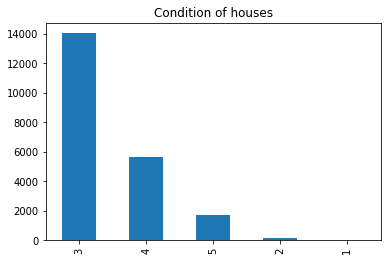

In [18]:
# House condition
house['condition'].value_counts().plot.bar(title='Condition of houses')

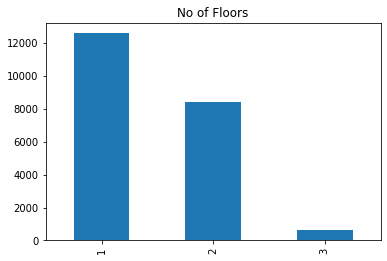

In [19]:
# House condition
house['floors'].value_counts().plot.bar(title='No of Floors')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fce861a9e10>],
      dtype=object)

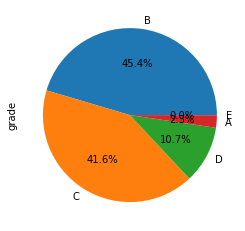

In [20]:
# distribution of the different grades
house.grade.value_counts().plot(kind = 'pie', autopct = '%0.1f%%',subplots = True)

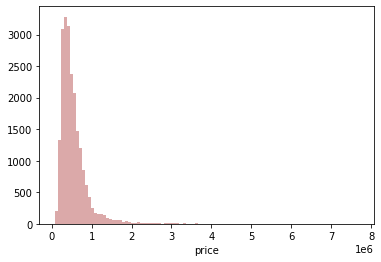

In [21]:
# Check distribution of our dependent variable, Price
sns.distplot(house['price'], kde = False, color ='brown', bins = 100)

In [22]:
print('Skewness= ',house['price'].skew())
print('Kurtosis= ',house['price'].kurt())

Skewness=  4.021467451317612
Kurtosis=  34.517437729615054


We see that this is positively skewed and We got a kurtosis value of approximately 34.5 which proves that the distribution is leptokurtic

This shows most houses purchased are affordable. There are outliers which are expected because high-valued houses tend to be fewer


Bivariate Analysis

Text(0.5, 1.0, 'Price per Number of Bedrooms')

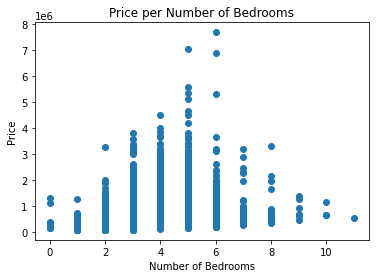

In [23]:
# investigating the effect of number of bedrooms on the price of the house
plt.scatter(house.bedrooms, house.price.values)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Price per Number of Bedrooms")

Simply, house prices increased somewhat with the number of bedrooms indicating a positive relationship

Text(0.5, 1.0, 'Price per Number of Bathrooms')

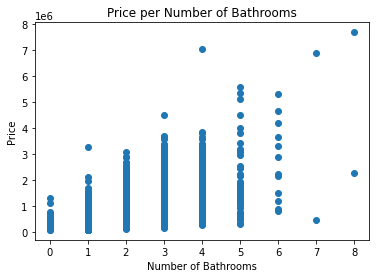

In [24]:
# investigating whether there is a relationship between the number of bathrooms and the price
plt.scatter(house.bathrooms, house.price.values)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.title("Price per Number of Bathrooms")



There is a somewhat positive relationship between price and the number of bathrooms. However, here the relationship appears to be a lot stronger than the one between price and the number of bedrooms

3.Feature engineering



We need to encode the 'grade' column so that there will not be any issues while training the model that might arise due to the presence of a categorical variable in the dataset.


In [25]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
house['grade']= label_encoder.fit_transform(house['grade'])

##4. Modeling


##4.1 Multiple Linear Regression

**Assumptions for MLR and Feature Engineering**

    1. There should be a linear relationship between the independent variables and the dependent variable
    2. There should be little to no auto-correlation
    3. There should be little to no multicollinearity
    4. There should not be any outliers    
    5. There should be no heteroscedasticity    
    6. The sample observations should be independent of each other.


In [26]:
# Check for Multicollinearity

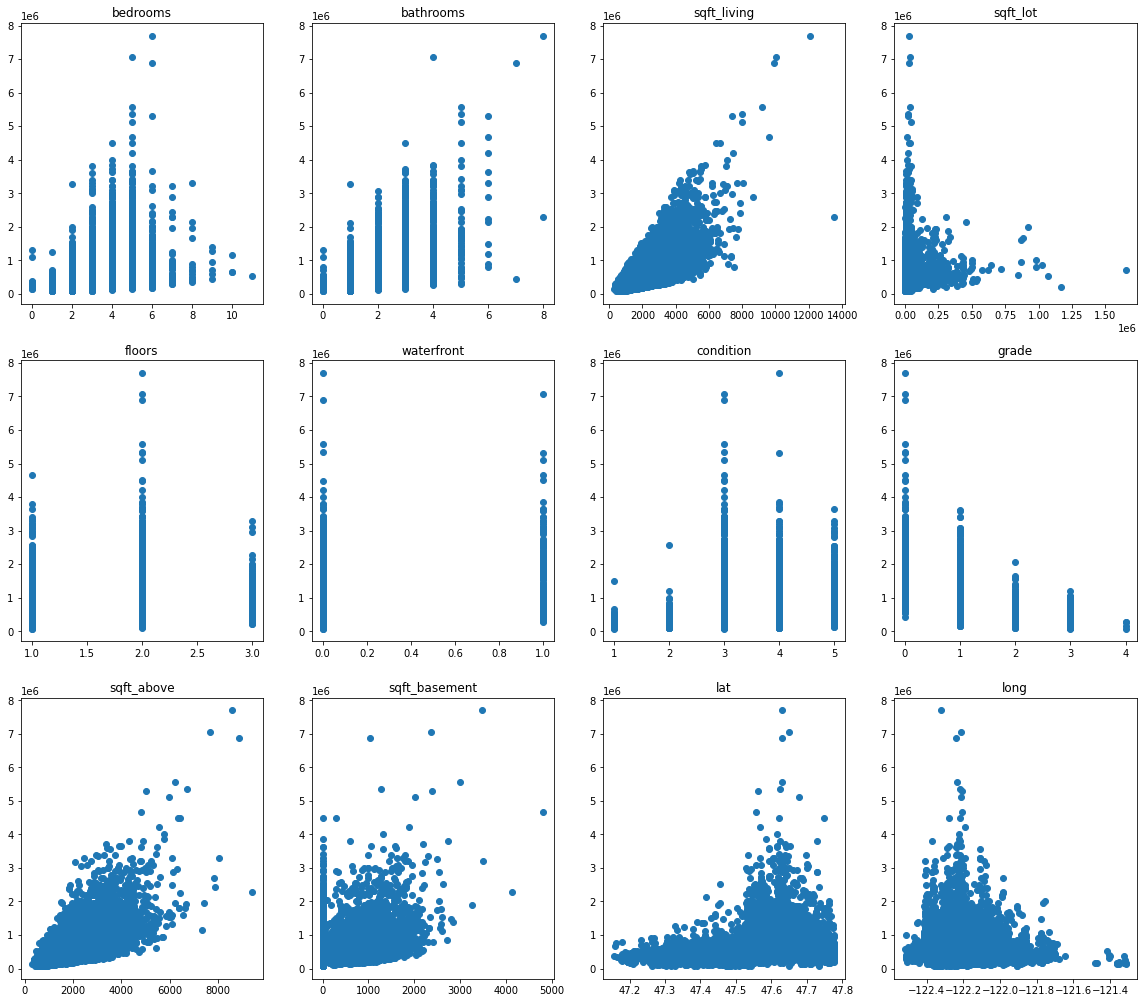

In [27]:
#Checking that The relationship between independent and dependent variables should be linear 
columns_dict={'bedrooms':1, 'bathrooms':2, 'sqft_living':3, 'sqft_lot':4,
       'floors':5, 'waterfront':6,  'condition':7, 'grade':8, 'sqft_above':9,
       'sqft_basement':10,'lat':11, 'long':12}
plt.figure(figsize=(20,30))
# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.scatter(house [variable], house['price'])
  plt.title(variable)
plt.show()



From the scatter plots above we can see that the some attributes have a linear relationship with the target variable price. A number of independent variables violate this assumptions


In [28]:
house.waterfront.value_counts()

0    21447
1      163
Name: waterfront, dtype: int64

In [29]:
# Check correlation of the independent variables
factors= house.drop(['price'],axis=1)
corr=factors.corr()
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,lat,long
bedrooms,1.000000,0.480457,0.591475,0.032807,0.160687,-0.006610,0.025377,-0.350692,0.490625,0.309456,-0.010581,0.133896
bathrooms,0.480457,1.000000,0.697914,0.085313,0.484886,0.058799,-0.125962,-0.552834,0.639963,0.250920,0.031385,0.179387
sqft_living,0.591475,0.697914,1.000000,0.172830,0.353327,0.103820,-0.058768,-0.645519,0.876600,0.435054,0.052521,0.240221
sqft_lot,0.032807,0.085313,0.172830,1.000000,-0.008919,0.021601,-0.008967,-0.076163,0.183527,0.015271,-0.085680,0.229552
floors,0.160687,0.484886,0.353327,-0.008919,1.000000,0.019654,-0.293188,-0.476790,0.517903,-0.235802,0.029543,0.158923
waterfront,-0.006610,0.058799,0.103820,0.021601,0.019654,1.000000,0.016652,-0.056642,0.072080,0.080585,-0.014272,-0.041904
condition,0.025377,-0.125962,-0.058768,-0.008967,-0.293188,0.016652,1.000000,0.139462,-0.158212,0.174071,-0.014971,-0.106512
grade,-0.350692,-0.552834,-0.645519,-0.076163,-0.476790,-0.056642,0.139462,1.000000,-0.629971,-0.160882,-0.106191,-0.179029
sqft_above,0.490625,0.639963,0.876600,0.183527,0.517903,0.072080,-0.158212,-0.629971,1.000000,-0.051923,-0.000823,0.343791
sqft_basement,0.309456,0.250920,0.435054,0.015271,-0.235802,0.080585,0.174071,-0.160882,-0.051923,1.000000,0.110535,-0.144743


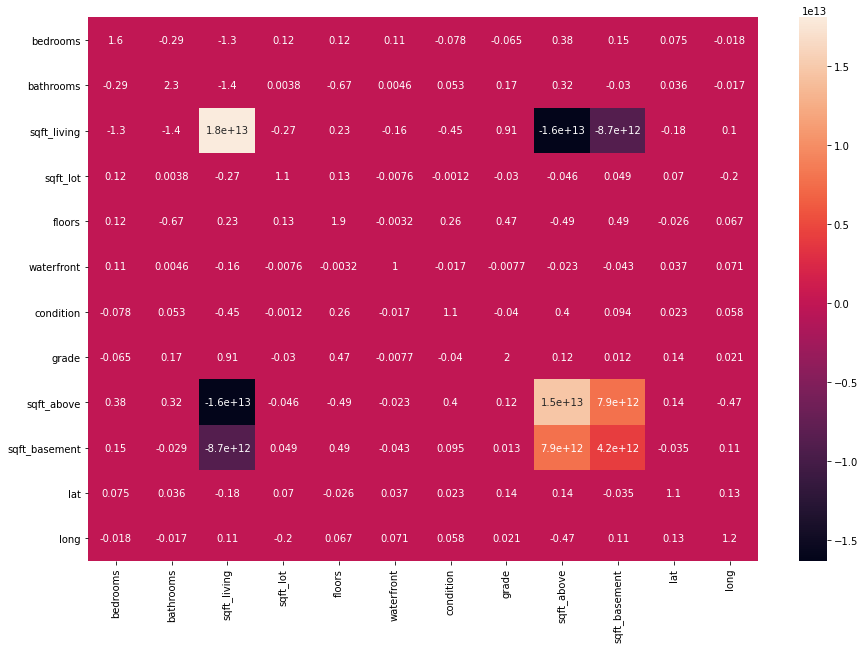

In [30]:
# Calculate VIF
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

# using a heatmap to display the results
plt.figure(figsize = (15, 10))
sns.heatmap(vif, annot = True)

In [31]:
# We drop the sqft_above and sqft_basement columns since it has a high VIF value
factors = factors.drop(['sqft_above','sqft_living'],axis=1)
correlations = factors.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_basement,lat,long
bedrooms,1.416127,-0.526377,0.047773,0.041291,0.069206,-0.078588,0.184600,-0.283918,0.069337,-0.116835
bathrooms,-0.526377,2.038411,-0.085948,-0.758630,-0.047573,0.052334,0.466364,-0.478990,0.030040,-0.133077
sqft_lot,0.047773,-0.085948,1.072360,0.105814,-0.024114,-0.001497,0.062743,-0.014099,0.067720,-0.236756
floors,0.041291,-0.758630,0.105814,1.860624,-0.019402,0.257927,0.563557,0.669653,-0.028011,0.031257
waterfront,0.069206,-0.047573,-0.024114,-0.019402,1.016268,-0.016932,0.046371,-0.081892,0.035731,0.049960
condition,-0.078588,0.052334,-0.001497,0.257927,-0.016932,1.117628,-0.039453,-0.121783,0.023305,0.057288
grade,0.184600,0.466364,0.062743,0.563557,0.046371,-0.039453,1.683012,0.235726,0.147873,0.140870
sqft_basement,-0.283918,-0.478990,-0.014099,0.669653,-0.081892,-0.121783,0.235726,1.480312,-0.117353,0.244911
lat,0.069337,0.030040,0.067720,-0.028011,0.035731,0.023305,0.147873,-0.117353,1.053645,0.130517
long,-0.116835,-0.133077,-0.236756,0.031257,0.049960,0.057288,0.140870,0.244911,0.130517,1.175452


We finally get VIF values of less than 5,thus little to no multicollinearity. We can continue with the Analysis

Training the model

In [32]:
factors.drop('zipcode',axis=1,inplace=True)

In [33]:
# We split our new dataset into train & test sets
X = factors.values
y = house['price'].values
print(X.shape)
print(y.shape)

# Scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

# now training our model
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)



(21610, 10)
(21610,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# print the coefficients and intercept
print('Coefficients: \n', reg.coef_)

print('Intercept: \n',reg.intercept_)

Coefficients: 
 [  13625.12394217  106821.04456618   20876.73462943   -3920.94019039
   81787.30768974   32585.08640935 -112414.06477839   42982.91069413
   95040.20418237  -11007.78829437]
Intercept: 
 539436.4227679238


In [35]:
# Predict on test data
y_pred = reg.predict(X_test)

# check the difference between the actual value and predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(5)



,Actual,Predicted
0,269000.0,274349.837055
1,299000.0,441416.933181
2,1080000.0,775593.863612
3,365000.0,576028.483205
4,500000.0,622963.452993


In [36]:
# assessing the model's accuracy
from sklearn.metrics import mean_squared_error,r2_score
MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", MSE)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     %  r2_score(y_test, y_pred))


Mean Squared Error: 72188680917.18527
Coefficient of determination: 0.49


In [37]:
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print('Linear model MSE: ',first_model)

Linear model MSE:  66951686770.783226


We will do the linear regression with all the values, instead of dropping them

In [38]:
X2=house.drop('price',axis=1)
y2=house.price
regression = LinearRegression()
regression.fit(X2,y2)
linear_model = (mean_squared_error(y_true=y2,y_pred=regression.predict(X2)))
linear_model

47976362089.97205

Using all features, our model seems to improve with a mean squared error of 47976362089.97205. The reduced model had a MSE of 66951686770.783226

This could be that we dropped the wrong variables or something was wrong with the data

Residual plots and Heteroscedasticity Test

In [39]:
# now creating residuals by substracting the test value from the predicted value for each row
# in our dataset

residuals = np.subtract(y_pred, y_test)
residuals.mean()

-3712.6103621519314

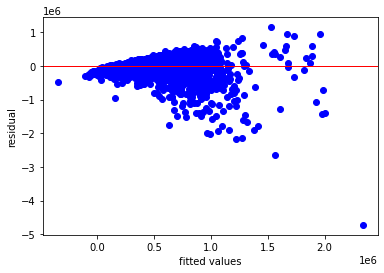

In [40]:
# plotting the residuals

plt.scatter(y_pred, residuals, color = 'blue')
plt.figsize = [12, 10]
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = residuals.mean(), color = 'red', linewidth = 1)
plt.show()



Now testing for heteroscedasticity using Barlett's test. This test establishes as a null hypothesis that the variance is equal for all our datapoints, and the new hypothesis that the variance is different for at least one pair of datapoints.


In [41]:
test_result, p_value = stats.bartlett(y_pred, residuals)
print("Test result:", test_result)
print("P-value:", p_value)

Test result: 7.49513233357544
P-value: 0.006186598497071564


In [42]:
# to interpret the results, we must compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred) - 1
probability = 1 - p_value
critical_value = stats.chi2.ppf(probability, degree_of_freedom)

print("Degree of Freedom:", degree_of_freedom)
print("Probability:", probability)
print("Critical Value:", critical_value)

Degree of Freedom: 4321
Probability: 0.9938134015029284
Critical Value: 4557.030441319312


In [43]:
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


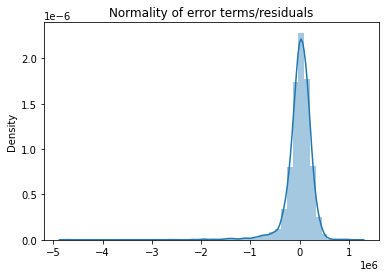

In [44]:
#Distribution of error terms
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Some of our factors suffered from multicollinearlity, thus it is important to apply regularization techniques to solve this. Also our target variable price was skewed, which means we should try a different kind of approach like Quantile regression.

## 4.2 Quantile Regression

Quantile regression is an extension of linear regression which is generally used when outliers are present and the data also has high skewedness and heteroscedasticity. Unlike normal linear regression, quantile predicts the quanatile for a given independent variable or set of independent variables.

Quantile regression works best when the following are true of our dependent variable y:

- is continuous
- does not have any zeros
- does not have too many repeated values

In [45]:
house_q=house.drop(['sqft_above', 'sqft_basement','zipcode'],axis=1)


In [46]:
# Feature Selection
df_corr = house_q.corr(method='pearson')['price']  
qlist = df_corr[abs(df_corr) > 0.1]
qlist

price          1.000000
bedrooms       0.315435
bathrooms      0.510096
sqft_living    0.702046
floors         0.237215
waterfront     0.266332
grade         -0.524315
lat            0.306922
Name: price, dtype: float64

In [47]:
#Separating features from target
Xq=house_q[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','condition','grade','lat','long']]
yq=house_q.price
#Creating traing and testing set
Xq_train,Xq_test, yq_train, yq_test = train_test_split(Xq, yq, test_size = 0.3, random_state = 0)

In [48]:
house_q.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'lat', 'long'],
      dtype='object')

In [49]:
import statsmodels.formula.api as smf
#Creating a quantile regression model
mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + grade + floors + lat + long+condition +waterfront', house_q)
#Getting summary for 50% quantile
res1 = mod.fit(q=.5)
print(res1.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3802
Model:                       QuantReg   Bandwidth:                   2.297e+04
Method:                 Least Squares   Sparsity:                    3.185e+05
Date:                Sat, 24 Jul 2021   No. Observations:                21610
Time:                        12:36:24   Df Residuals:                    21599
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2238.4523     12.773   -175.242      0.000   -2263.489   -2213.415
bedrooms     -3.81e+04   1517.321    -25.107      0.000   -4.11e+04   -3.51e+04
bathrooms    1.245e+04   2235.255      5.570      0.000    8068.388    1.68e+04
sqft_living   176.2917      2.049     86.019   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [50]:
#Summary for 25%
res2 = mod.fit(q=.25)
print(res2.summary())



                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3570
Model:                       QuantReg   Bandwidth:                   2.088e+04
Method:                 Least Squares   Sparsity:                    2.727e+05
Date:                Sat, 24 Jul 2021   No. Observations:                21610
Time:                        12:36:28   Df Residuals:                    21599
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1327.3703     10.062    131.919      0.000    1307.648    1347.093
bedrooms    -2.237e+04   1092.255    -20.478      0.000   -2.45e+04   -2.02e+04
bathrooms    1.528e+04   1650.103      9.259      0.000     1.2e+04    1.85e+04
sqft_living   130.8693      1.475     88.698   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [51]:
# import statsmodels.regression.quantile_regression as Q_reg


# quantiles = [0.25, 0.5, 0.75]

# # Get the model, and the cofficients in (a) - (b)
# def Qreg(q):
#    # (a) Modeling 
#    mod = Q_reg.QuantReg(Xq_train, yq_train).fit(q=q)
    
#    # (b) Get the coefficients and the lower and upper bounds
#    coefs = pd.DataFrame()
#    coefs['param'] = mod.params
#    coefs = pd.concat([coefs,mod.conf_int()],axis=1) # "mod.conf_int" will give the lower and upper bounds
#    coefs['q'] = q
#    coefs.columns = ['coef','beta_lower','beta_upper','quantile']
    
#    return coefs

# Qreg_coefs = pd.DataFrame()
# for q in quantiles:
#     coefs = Qreg(q)
#     Qreg_coefs = pd.concat([Qreg_coefs,coefs])

# # Get the R-squared for Q=0.5
# q = 0.5
# Y_test_pred1 = Q_reg.QuantReg(Xq_train, yq_train).fit(q=0.25).predict(fet_test)
# Y_test_pred2 = Q_reg.QuantReg(Xq_train, yq_train).fit(q=0.5).predict(fet_test)
# Y_test_pred3 = Q_reg.QuantReg(Xq_train, yq_train).fit(q=0.75).predict(fet_test)
# r2_50 = r2_score(Xq_test,Y_test_pred2)
# r2_25 = r2_score(Xq_test,Y_test_pred1)
# r2_75 = r2_score(Xq_test,Y_test_pred3)
# print('R2 score for the 50th percentile is {}'.format(r2_50) ) 
# print('R2 score for the 25th percentile is {}'.format(r2_25) ) 
# print('R2 score for the 75th percentile is {}'.format(r2_75) )

My Laptop crashed severally doing this regression and runtime restarted. Unfortunately i could not complete this analysis.

## 4.3 Ridge Regression

Ridge regression is a technique that is specialized to analyze multiple regression data which exhibits multicollinearity in nature. Multicollinearity refers to the phenomenon where there are high correlations between more than two independent/predicted variables.

In our data, while performing VIF we noted the multicollinearlity in our data which forced has to eliminate some features during Multiple Linear regression modelling.

Since ridge regression regularizes this, we will use all the variables in this step to check how the model performs as compared to multiple linear regression

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [53]:
X1=house.drop('price',axis=1)
y1=house.price

In [54]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X1,y1)
first_model = (mean_squared_error(y_true=y1,y_pred=regression.predict(X1)))
print('Linear model MSE: ',first_model)

Linear model MSE:  47976362089.97205


In [55]:
# Cross validation using Grid search cv

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# we will fit our variables to the grid search and then use it to get the best parameters and the
# best score that will allow us to determine the model's strength
search.fit(X, y)

print("Best Params:", search.best_params_)
print("Best Score:", abs(search.best_score_))

Best Params: {'alpha': 0.01}
Best Score: 67518853924.96108




Our baseline model's MSE was 47976362089.97205, the ridge regression model's MSE is 67518853924.96108. Clearly our ridge model is performing worse than our baseline model.

We now will try ridge again but this time with the best parameter of 0.01.


In [56]:
ridge2 = Ridge(normalize = True, alpha = 0.01)
ridge2.fit(X1, y1)
ridge_2 = (mean_squared_error(y_true = y1, y_pred = ridge2.predict(X1)))
print(ridge_2)


47983846149.57565


This is a lower score than the one gotten using the grid search, but it's still slightly larger than that of our baseline model.
We can run another model using a larger alpha, say 0.1 and check the MSE 

In [57]:
ridge3 = Ridge(normalize = True, alpha = 0.1)
ridge3.fit(X1, y1)
ridge_3 = (mean_squared_error(y_true = y1, y_pred = ridge3.predict(X1)))
print(ridge_3)



48512112028.80103


Increasing the value of alpha increases the MSE. Therefore alpha of 0.01 is the best parameter for ridge regression models. 
Cross validations helps us identify the best alpha value to use

**Limitations**

Ridge regression has the following limitations:
* It will include all the predictors in the final model instead of eliminating the irrelevant coefficients
* Doesn’t perform feature selection
* Unlike lasso regression, it doesn’t shrink the coefficients completely to 0

##4.4 Lasso Regression

Lasso regression is typically used under the following circumstances:

- the target variable is normally distributed
- there is a linear relationship between the independent variable and the dependent variable
- normality is not assumed

In [58]:
# first we standardize our data using a scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = house.drop(columns = ['price'])
y = house['price']

X = scaler.fit_transform(X)

In [59]:
# next we create our Lasso model
from sklearn.linear_model import Lasso

lasso = Lasso(tol = 0.0001)
lasso_model = lasso.fit(X, y)

print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_)

lasso score: 0.6445336796431034
lasso MSE: 47976362118.45413
lasso coef: [-48860.25542225  30268.44063764 265182.12559724   1012.18894765
 -23410.01606414  68574.9283882   31013.91009178 -36134.62732355
  -5188.02989849 -28219.81052384 -22249.3704055   97606.04379837
 -53091.12483663]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105747537785512.62, tolerance: 291664533601.623
  positive)


In [60]:
# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
linear = LinearRegression()
lasso = Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')

In [61]:
# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.648060809667613
linear score: 0.6480706907336606
lasso MSE: 47860917765.211754
linear MSE: 47859574019.18254
lasso best estimator coef: [-50189.02745115  29820.82376841 247614.72852816   1692.62887518
 -22456.84759787  64902.75482746  30118.83848773 -35424.00919671
  10254.08666967 -17915.89242185 -21678.73308688  98375.37207467
 -51799.32824179]
linear coef: [-50242.3840264   29895.65192656 126841.98994783   1713.69318913
 -22548.8363504   64919.97151044  30142.04257819 -35442.15388551
 119189.0051133   40215.78822745 -21736.37311692  98412.98252048
 -51870.84573423]


From this algorithm, we see that there are not much differences between the lasso model and the linear model. 
The Linear MSE is slighter lower than the Lasso MSE. We also now know that the best hyperparameter value to use for alpha is 24

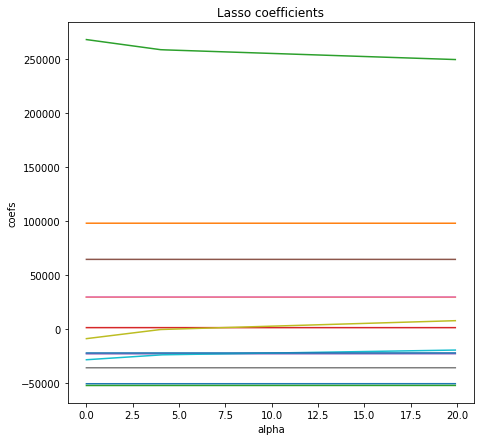

In [62]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso,)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()



## 4.5 Elastic Net Regression

Elastic net is basically a combination of both L1 and L2 regularization, i.e; a combination of lasso and ridge regression. If there is a bunch of correlated independent variables in a dataset, then elastic net will simply form a group consisting of these correlated variables. If any one of the variable of this group is a strong predictor (meaning having a strong relationship with dependent variable), then we will include the entire group in the model building, because omitting other variables (like what we did in lasso) might result in losing some information in terms of interpretation ability, leading to a poor model performance. In our case we will use all our features for this regression, and compare it perfomance with OLS.

In [63]:
X=house.drop('price',axis=1)
y=house.price

In [64]:
# getting the MSE of the linear model which will be our baseline model

linear_model

47976362089.97205

In [65]:
# checking our baseline model's coefficients
coef_dict_baseline = {}
for coef, feat in zip(reg.coef_, X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 106821.04456617637,
 'bedrooms': 13625.123942173883,
 'condition': -112414.06477839428,
 'floors': 81787.30768973797,
 'grade': 42982.910694132224,
 'sqft_above': 95040.20418237287,
 'sqft_basement': -11007.788294373007,
 'sqft_living': 20876.73462942552,
 'sqft_lot': -3920.940190386209,
 'waterfront': 32585.08640935412}

In [66]:
# creating our Elastic Net model now
# like lasso and ridge, it requires normalized data
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(normalize = True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)



In [67]:
search.fit(X,y)
print('Best parameter: ',search.best_params_)
abs(search.best_score_)

Best parameter:  {'alpha': 1e-05, 'l1_ratio': 0.8}


48252084278.31577

From the above calculations, we see that we should use an alpha value of 1e-05 and a l1 ratio value of 0.8. We also got a score of roughly 48252084278.31577 which is larger than our baseline model's score of about 47976362089.97205. We will now try Elastic Net regression again but this time we will adjust the parameters to the recommended values and see if there will be any improvements

In [68]:
elastic = ElasticNet(normalize = True, alpha = 1e-05, l1_ratio = 0.8)
elastic.fit(X_train, y_train)
second_elastic = (mean_squared_error(y_true = y_train, y_pred = elastic.predict(X_train)))
print(second_elastic)



48112958829.49487


The model improved slightly but the linear model still has the lowest MSE

In [69]:
# checking our coefficients
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_, X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 31014.48398082481,
 'bedrooms': -44519.31918024625,
 'condition': 29389.571834882892,
 'floors': -19857.864899137796,
 'grade': -37727.09953061919,
 'lat': 95099.7588625259,
 'long': -47841.953172982794,
 'sqft_above': 113135.39107930019,
 'sqft_basement': 40136.47617496429,
 'sqft_living': 121444.31870912305,
 'sqft_lot': 2373.3018778712467,
 'waterfront': 63643.23536386149,
 'zipcode': -18752.062152126113}


 *Limitations* 

A limitation of Elastic net regression is that it can suffer from double shrinkage, which leads to increased bias and poor predictions.


## 5. Conclusion
Multiple Linear Regression performed the best. The model was neither overfitted nor underfitted. Though affected by multicollinearlity,the model improves a great deal after using Lasso regression by removing the correlated variables.

Elastic Net MSE: 48112958829.49487
This models should also be examined on new data to check their perfomance.